<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/Lab_13_Mapping2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Interactive Mapping
Building on the mapping tools we discussed last week, we'll explore interactive mapping in this notebook. How can we add to our data narrative with an interactive map? It is important to ask this question so that we are not adding complexity -- an interactive map rather than a static map -- for its own sake. We should use interactive maps when we have a reason, when we believe that they add an essential element to the insight of our analysis. User engagement could be that reason, but we want to reflect on this in our design decisions.

Again, we'll use the geoPackage library for data management. User guide: https://geopandas.org/en/stable/docs/user_guide.html

To draw the interactive maps, we'll use Folium, which is an implementation of the leaflet.js library for Python. User guide: https://python-visualization.github.io/folium/latest/user_guide.html

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install folium #Library from leaflet.js - adds interactivity
!pip install mapclassify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.1 MB/s eta 0:00:00


In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import folium
import mapclassify
import shapefile



# To access the file path - right click folder on left side > copy path

# How to mount google drive folder to Python
- from google.colab import drive
drive.mount('/content/drive')

## **Activity - create interactive map using MA location data**

- I found data on lobsters but the resulting map doesn't lay properly

<Axes: >

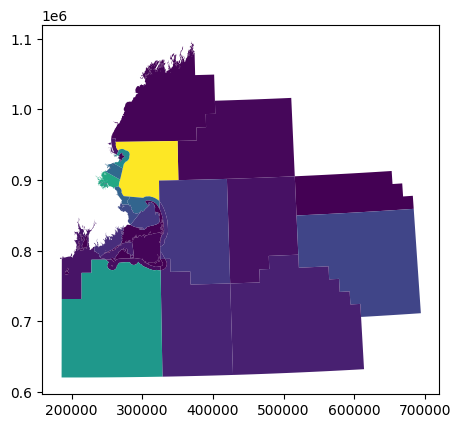

In [63]:
#To access the file path - right click folder on left side > copy path
#MA_map = gpd.read_file('/content/Places_of_Worship.zip!Places_of_Worship')

#Can access the data either by zipped folder of extracted

# (1) READING ZIPPED FOLDER - must list the subdirectory (folder) that has the shapefile
MA_mapNew = gpd.read_file('/content/lobharv.zip!LOBHARV_POLY.shp') # for zip file - modified path to include .shp & use '/'

# (2) READING EXTRACTED FOLDER
#MA_mapNew = gpd.read_file('/content/lobharv_extracted/LOBHARV_POLY.shp') #pathway for extracted zip folder
#this is pathway for the temporary file stash

MA_mapNew.plot(column="POUNDS97")

In [38]:
MA_mapNew.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA_ID     284 non-null    int64   
 1   POUNDS97    284 non-null    float64 
 2   SHAPE_AREA  284 non-null    float64 
 3   SHAPE_LEN   284 non-null    float64 
 4   geometry    284 non-null    geometry
dtypes: float64(3), geometry(1), int64(1)
memory usage: 11.2 KB


In [56]:
MA_mapNew.head()

AREA_ID  POUNDS97    SHAPE_AREA     SHAPE_LEN  \
0       20   33286.0  1.225449e+10  1.436282e+06   
1        0       0.0  6.506739e+05  4.047556e+03   
2        0       0.0  3.495891e+06  1.034678e+04   
3        0       0.0  1.195740e+06  5.885525e+03   
4        0       0.0  3.652511e+05  2.585150e+03   

                                            geometry  
0  POLYGON ((372173.53 1087249.38, 372022.66 1085...  
1  POLYGON ((370605.38 1084929.25, 370539.22 1085...  
2  POLYGON ((369217.06 1082263.13, 369168.63 1082...  
3  POLYGON ((366278 1080797.63, 366185.31 1081025...  
4  POLYGON ((369114.06 1080749.13, 368933.63 1080...

In [58]:
MA_mapNew.describe()

AREA_ID      POUNDS97    SHAPE_AREA     SHAPE_LEN
count  284.000000  2.840000e+02  2.840000e+02  2.840000e+02
mean     1.176056  5.438203e+04  5.620298e+08  4.334693e+04
std      4.291992  2.685170e+05  2.939465e+09  1.500918e+05
min      0.000000  0.000000e+00  2.383640e+03  2.171385e+02
25%      0.000000  0.000000e+00  2.275193e+04  6.443334e+02
50%      0.000000  0.000000e+00  1.069262e+05  1.567794e+03
75%      0.000000  0.000000e+00  8.576088e+05  5.078313e+03
max     25.000000  2.972183e+06  2.565525e+10  1.436282e+06

In [62]:
MA_mapNew['POUNDS97'].value_counts()

POUNDS97
0.0          258
356527.0       2
33286.0        1
480930.0       1
1530.0         1
238403.0       1
103990.0       1
284948.0       1
264115.0       1
376118.0       1
42142.0        1
151643.0       1
612309.0       1
671892.0       1
957451.0       1
921823.0       1
486185.0       1
137493.0       1
10864.0        1
1008314.0      1
1398415.0      1
2972183.0      1
161583.0       1
1780188.0      1
47773.0        1
1587864.0      1
Name: count, dtype: int64

<Axes: >

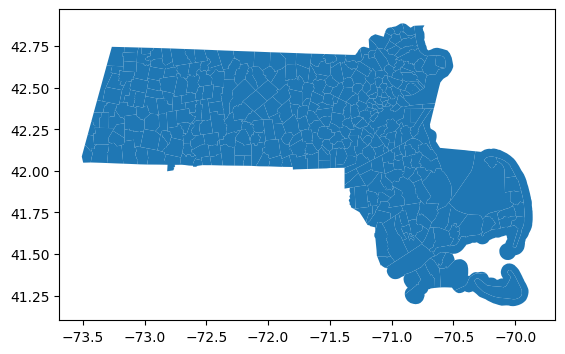

In [41]:
MA_census_map = gpd.read_file('/content/tl_2024_25_cousub.zip')
MA_census_map.plot()

In [42]:
MA_census_map.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   357 non-null    object  
 1   COUNTYFP  357 non-null    object  
 2   COUSUBFP  357 non-null    object  
 3   COUSUBNS  357 non-null    object  
 4   GEOID     357 non-null    object  
 5   GEOIDFQ   357 non-null    object  
 6   NAME      357 non-null    object  
 7   NAMELSAD  357 non-null    object  
 8   LSAD      357 non-null    object  
 9   CLASSFP   357 non-null    object  
 10  MTFCC     357 non-null    object  
 11  FUNCSTAT  357 non-null    object  
 12  ALAND     357 non-null    int64   
 13  AWATER    357 non-null    int64   
 14  INTPTLAT  357 non-null    object  
 15  INTPTLON  357 non-null    object  
 16  geometry  357 non-null    geometry
dtypes: geometry(1), int64(2), object(14)
memory usage: 47.5+ KB


<Axes: >

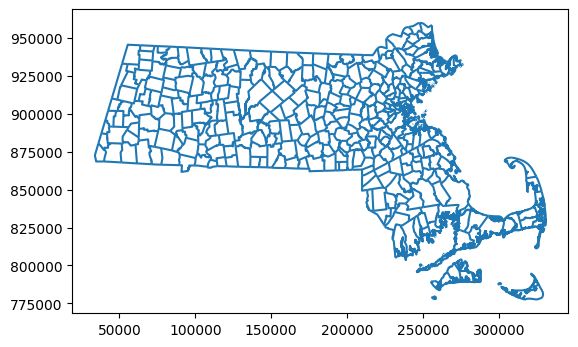

In [43]:
MA_censustowns_map = gpd.read_file('/content/CENSUS2020TOWNS_SHP.zip')
MA_censustowns_map.plot()

In [44]:
MA_censustowns_map.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OUTLINE    1518 non-null   int32   
 1   SHAPE_LEN  1518 non-null   float64 
 2   geometry   1518 non-null   geometry
dtypes: float64(1), geometry(1), int32(1)
memory usage: 29.8 KB


In [45]:
MAcensus_df = pd.read_csv('/content/MA_race.csv', dtype={'GEO_ID':'object'})
MAcensus_df = MAcensus_df.rename(columns={"GEO_ID": "GEOID"})
MAcensus_df = MAcensus_df.rename(columns={"Town": "GEOG_CITY"})
MAcensus_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GEOID                                       351 non-null    object 
 1   GEOG_CITY                                   351 non-null    object 
 2   County                                      351 non-null    object 
 3   Total Pop                                   351 non-null    int64  
 4   White                                       351 non-null    int64  
 5   Black or African American                   351 non-null    int64  
 6   American Indian and Alaska Native           351 non-null    int64  
 7   Asian                                       351 non-null    int64  
 8   Native Hawaiian and Other Pacific Islander  350 non-null    float64
 9   Some Other Race                             350 non-null    float64
dtypes: float64(2),

In [46]:
MA_census_map = MA_census_map.merge(MAcensus_df)
MA_census_map.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   STATEFP                                     347 non-null    object  
 1   COUNTYFP                                    347 non-null    object  
 2   COUSUBFP                                    347 non-null    object  
 3   COUSUBNS                                    347 non-null    object  
 4   GEOID                                       347 non-null    object  
 5   GEOIDFQ                                     347 non-null    object  
 6   NAME                                        347 non-null    object  
 7   NAMELSAD                                    347 non-null    object  
 8   LSAD                                        347 non-null    object  
 9   CLASSFP                                     347 non-null    object  

In [50]:
MA_census_map['Percent Black in Town'] = MA_census_map['Black or African American'] / MA_census_map['Total Pop']

In [55]:
# Use explore method attached to geopandas to draw the map
# You can decide the interactive functions in the map
m = MA_census_map.explore(
    column='Percent Black in Town',
    cmap='binary',
    tooltip='Percent Black in Town',
    name='base')
MA_mapNew.explore(
    m=m,
    column='POUNDS97',
    cmap='tab10',
    marker_kwds=dict(radius=2.5, fill=True),
    tooltip='POUNDS97',
    legend_kwds={'loc':'lower left'},
    name='Lobster pounds')
folium.TileLayer("CartoDB positron", show=True).add_to(m)  # use folium to add alternative tiles #added layer CartoDB to make the overlay easier than Open Street map
folium.LayerControl().add_to(m)

m

## Activity

Create an interactive map. You can use any geography of interest. The shapefiles and demographics from last week and this week are available in the Teams module, but you can also choose another geography if you wish.

Explain how the interactive quality of the map offers insight into the visualization of the data.